### Imports

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

### Data Load

In [32]:
df = pl.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv")

df = df.drop_nulls()
df = df.with_columns(
    (pl.col("body_mass_g") / 1000).alias("body_mass_kg")
)
print(df)

shape: (333, 8)
┌─────────┬───────────┬─────────────┬─────────────┬─────────────┬────────────┬────────┬────────────┐
│ species ┆ island    ┆ bill_length ┆ bill_depth_ ┆ flipper_len ┆ body_mass_ ┆ sex    ┆ body_mass_ │
│ ---     ┆ ---       ┆ _mm         ┆ mm          ┆ gth_mm      ┆ g          ┆ ---    ┆ kg         │
│ str     ┆ str       ┆ ---         ┆ ---         ┆ ---         ┆ ---        ┆ str    ┆ ---        │
│         ┆           ┆ f64         ┆ f64         ┆ i64         ┆ i64        ┆        ┆ f64        │
╞═════════╪═══════════╪═════════════╪═════════════╪═════════════╪════════════╪════════╪════════════╡
│ Adelie  ┆ Torgersen ┆ 39.1        ┆ 18.7        ┆ 181         ┆ 3750       ┆ MALE   ┆ 3.75       │
│ Adelie  ┆ Torgersen ┆ 39.5        ┆ 17.4        ┆ 186         ┆ 3800       ┆ FEMALE ┆ 3.8        │
│ Adelie  ┆ Torgersen ┆ 40.3        ┆ 18.0        ┆ 195         ┆ 3250       ┆ FEMALE ┆ 3.25       │
│ Adelie  ┆ Torgersen ┆ 36.7        ┆ 19.3        ┆ 193         ┆ 3450     

### Averages

In [35]:
df2 = df.clone()
df2 = df2.group_by("species").agg([
    pl.col("bill_length_mm").mean(),
    pl.col("bill_depth_mm").mean()
])
    
print(df2)

shape: (3, 3)
┌───────────┬────────────────┬───────────────┐
│ species   ┆ bill_length_mm ┆ bill_depth_mm │
│ ---       ┆ ---            ┆ ---           │
│ str       ┆ f64            ┆ f64           │
╞═══════════╪════════════════╪═══════════════╡
│ Adelie    ┆ 38.823973      ┆ 18.34726      │
│ Chinstrap ┆ 48.833824      ┆ 18.420588     │
│ Gentoo    ┆ 47.568067      ┆ 14.996639     │
└───────────┴────────────────┴───────────────┘


### Standardize

In [39]:
arr = df.select("bill_length_mm", "bill_depth_mm").to_numpy()
standardized = (arr - arr.mean(axis=0)) / arr.std(axis=0)
print(standardized)

[[-8.96041890e-01  7.80732104e-01]
 [-8.22787867e-01  1.19583967e-01]
 [-6.76279821e-01  4.24729261e-01]
 [-1.33556603e+00  1.08587740e+00]
 [-8.59414878e-01  1.74702554e+00]
 [-9.32668901e-01  3.23014163e-01]
 [-8.77728384e-01  1.23845005e+00]
 [-5.29771775e-01  2.21299065e-01]
 [-9.87609419e-01  2.05217083e+00]
 [-1.72014965e+00  2.00131328e+00]
 [-1.35387953e+00  3.23014163e-01]
 [-9.69295913e-01  9.33304752e-01]
 [-2.73382694e-01  1.79788309e+00]
 [-1.75677666e+00  6.28159457e-01]
 [ 3.67590007e-01  2.20474348e+00]
 [-1.13411746e+00  5.77301908e-01]
 [-1.15243097e+00  7.80732104e-01]
 [-1.48207407e+00  1.03501985e+00]
 [-1.06086344e+00  4.75586810e-01]
 [-9.50982407e-01  1.78688686e-02]
 [-1.59195511e+00  8.82447203e-01]
 [-6.21339303e-01  7.29874555e-01]
 [-6.39652809e-01  3.73871712e-01]
 [-1.11580396e+00  7.29874555e-01]
 [-6.39652809e-01  8.82447203e-01]
 [-8.22787867e-01 -2.36418877e-01]
 [-1.24399850e+00  4.75586810e-01]
 [-8.22787867e-01  3.23014163e-01]
 [-5.66398786e-01  8

### Visualization

{'Chinstrap': 0, 'Adelie': 1, 'Gentoo': 2}


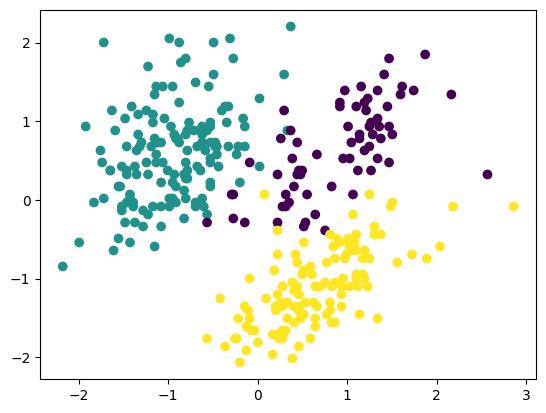

In [52]:
length_series = pl.Series(name="length_z", values=standardized[:, 0])
depth_series = pl.Series(name="depth_z", values=standardized[:, 1])

df = df.with_columns([length_series, depth_series])
species = df["species"].to_list()
species_map = {name:i for i, name in enumerate(set(species))}
colors = [species_map[s] for s in species]
print(species_map)
plt.scatter(df["length_z"], df["depth_z"], c=colors)
plt.show()

### Flipper Length Histogram

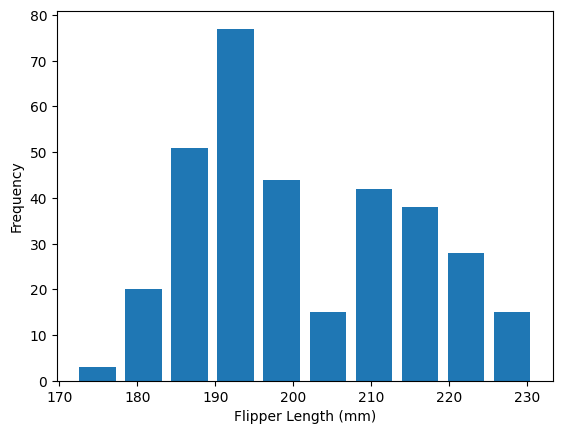

In [58]:
plt.hist(df["flipper_length_mm"], bins=10, rwidth=0.8)
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Frequency")
plt.show()